In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pandas.read_csv('d:/wine.txt')
alcohol = df[' Alcohol']
color_intensity = df[' Color intensity']

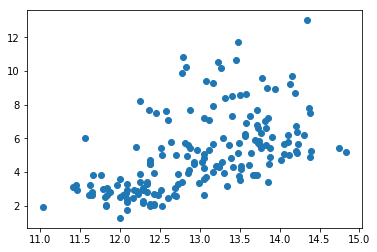

In [5]:
plt.scatter(alcohol, color_intensity)
plt.show()

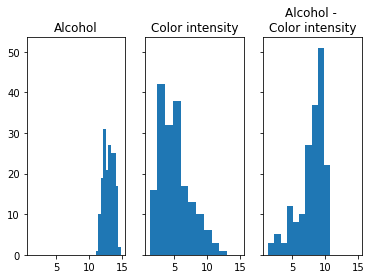

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
ax1.hist(alcohol)
ax1.title.set_text('Alcohol')
ax2.hist(color_intensity)
ax2.title.set_text('Color intensity')
ax3.hist(alcohol - color_intensity)
ax3.title.set_text('Alcohol - \nColor intensity')

In [9]:
# a = 0.05 amount = 177 =>
# Student's coef from table (alpha/2; amount -1 ):
t = 1.1541585


def count_confidence_interval_of_math_exp(amount, estimate):
    return t*numpy.sqrt(estimate/len(amount))


def count_confidence_interval_of_variance(amount, estimate, x_func):
    return estimate*(len(amount)-1)/x_func


def check_hypothesis_with_known_var(math_exp_x, math_exp_y, var_x, var_y, amount_x, amount_y):
    return numpy.abs(math_exp_x - math_exp_y) / numpy.sqrt((var_x / len(amount_x)) + (var_y / len(amount_y)))


def check_hypothesis_with_unknown_var(math_exp_x, math_exp_y, unbiased_var_x, unbiased_var_y, amount_x, amount_y,):
    return (numpy.abs(math_exp_x-math_exp_y))/((len(amount_x)-1)*unbiased_var_x + (len(amount_y) - 1) * unbiased_var_y)*\
           numpy.sqrt(((len(amount_x)*len(amount_y))*(len(amount_x)+len(amount_y)-2))/(len(amount_x)+len(amount_y)))

In [12]:
math_expectation_of_alcohol = alcohol.mean()
math_expectation_of_color_intensity = color_intensity.mean()

variance_of_alcohol = alcohol.var()
variance_of_color_intensity = color_intensity.var()

unbiased_variance_estimate_of_alcohol = alcohol.var(ddof=1)
unbiased_variance_estimate_of_color_intensity = color_intensity.var(ddof=1)

print('\nMath expectation of alcohol = ', round(math_expectation_of_alcohol, 4))
print('Math expectation of color intensity = ', round(math_expectation_of_color_intensity, 4), '\n')

print('Variance of alcohol = ', round(variance_of_alcohol, 4))
print('Variance of color intensity = ', round(variance_of_color_intensity, 4), '\n')

print('Unbiased variance estimate of alcohol = ', round(unbiased_variance_estimate_of_alcohol), 4)
print('Unbiased variance estimate of color intensity = ', round(unbiased_variance_estimate_of_color_intensity, 4), '\n')

print('Confidence interval of math expectation in alcohol: {} < m(x) < {}'.format(
      round(math_expectation_of_alcohol - count_confidence_interval_of_math_exp(
          alcohol, unbiased_variance_estimate_of_alcohol), 4),
      round(math_expectation_of_alcohol + count_confidence_interval_of_math_exp(
          alcohol, unbiased_variance_estimate_of_alcohol), 4)))

print('Confidence interval of math expectation in color intensity: {} < m(x) < {}'.format(
      round(math_expectation_of_color_intensity - count_confidence_interval_of_math_exp(
          color_intensity, unbiased_variance_estimate_of_color_intensity), 4),
      round(math_expectation_of_color_intensity + count_confidence_interval_of_math_exp(
          color_intensity, unbiased_variance_estimate_of_color_intensity)), 4), '\n')

# x^2[a/2, n-1]:
x_1 = 214.6284
# x^2[1 - a/2, n-1]:
x_2 = 141.1571
print('Confidence interval of variance in alcohol: {} < D(x) < {}'.format(
      round(variance_of_alcohol - count_confidence_interval_of_variance(alcohol,
                                                                        unbiased_variance_estimate_of_alcohol, x_1), 4),
      round(variance_of_alcohol + count_confidence_interval_of_variance(alcohol,
                                                                        unbiased_variance_estimate_of_alcohol, x_2)), 4))

print('Confidence interval of variance in color intensity: {} < D(x) < {}'.format(
      round(variance_of_color_intensity - count_confidence_interval_of_variance(
          color_intensity, unbiased_variance_estimate_of_color_intensity, x_1), 4),
      round(variance_of_color_intensity + count_confidence_interval_of_variance(
          color_intensity, unbiased_variance_estimate_of_color_intensity, x_2)), 4), '\n')

# Hypothesis with known variance:

# a = 0.05 =>
# Laplas' function [(1-2a)/2 = 0.45] = 0,1736
laplas_function = 0.1736
observable_variable = round(check_hypothesis_with_known_var(math_expectation_of_alcohol,
                                                            math_expectation_of_color_intensity,
                                                            variance_of_alcohol,
                                                            variance_of_color_intensity,
                                                            alcohol, color_intensity), 4)
if laplas_function == observable_variable:
    print("With known variance: H0 accepted, because Student's coef from table {} == {} observable coef".
          format(laplas_function, observable_variable))
if laplas_function < observable_variable:
    print("With known variance: H1 accepted, because Student's coef from table {} < {} observable coef".
          format(laplas_function, observable_variable))
else:
    print("With known variance: H0 accepted, because Student's coef from table {} > {} observable coef".
          format(laplas_function, observable_variable))

# Hypothesis with known variance:

# number = 177 + 177 - 2 = 352, a = 0.05 =>
# Student's coef:
t_352 = 1.64
observable_variable = round(check_hypothesis_with_unknown_var(math_expectation_of_alcohol,
                                                              math_expectation_of_color_intensity,
                                                              unbiased_variance_estimate_of_alcohol,
                                                              unbiased_variance_estimate_of_color_intensity,
                                                              alcohol, color_intensity), 7)
if t_352 == observable_variable:
    print("With unknown variance: H0 accepted, because Student's coef from table {} == {} observable coef".
          format(t_352, observable_variable))
if t_352 > observable_variable:
    print("With unknown variance: H0 accepted, because Student's coef from table {} > {} observable coef".
          format(t_352, observable_variable))
else:
    print("With unknown variance: H1 accepted, because Student's coef from table {} < {} observable coef".
          format(t_352, observable_variable))



Math expectation of alcohol =  13.0006
Math expectation of color intensity =  5.0581 

Variance of alcohol =  0.6591
Variance of color intensity =  5.3744 

Unbiased variance estimate of alcohol =  1 4
Unbiased variance estimate of color intensity =  5.3744 

Confidence interval of math expectation in alcohol: 12.9304 < m(x) < 13.0708
Confidence interval of math expectation in color intensity: 4.8575 < m(x) < 5.0 

Confidence interval of variance in alcohol: 0.1155 < D(x) < 1
Confidence interval of variance in color intensity: 0.9422 < D(x) < 12 

With known variance: H1 accepted, because Student's coef from table 0.1736 < 43.1404 observable coef
With unknown variance: H0 accepted, because Student's coef from table 1.64 > 1.3201156 observable coef
